## Import Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from catboost import CatBoostClassifier
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

## Reading Datafile

In [2]:
file = 'C:/Users/Shivam 007/OneDrive/Desktop/ML/EEG_Eye_State_Classification.csv'

df = pd.read_csv(file)
display(df.head())

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0


## Exploring Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14979 entries, 0 to 14978
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AF3           14979 non-null  float64
 1   F7            14979 non-null  float64
 2   F3            14979 non-null  float64
 3   FC5           14979 non-null  float64
 4   T7            14979 non-null  float64
 5   P7            14979 non-null  float64
 6   O1            14979 non-null  float64
 7   O2            14979 non-null  float64
 8   P8            14979 non-null  float64
 9   T8            14979 non-null  float64
 10  FC6           14979 non-null  float64
 11  F4            14979 non-null  float64
 12  F8            14979 non-null  float64
 13  AF4           14979 non-null  float64
 14  eyeDetection  14979 non-null  int64  
dtypes: float64(14), int64(1)
memory usage: 1.7 MB


In [4]:
print("Dataset shape:", df.shape)

Dataset shape: (14979, 15)


## Preprocessing and cleaning the data

In [5]:
missing_values = df.isnull().sum()

print("\nMissing values:")
print(missing_values)


Missing values:
AF3             0
F7              0
F3              0
FC5             0
T7              0
P7              0
O1              0
O2              0
P8              0
T8              0
FC6             0
F4              0
F8              0
AF4             0
eyeDetection    0
dtype: int64


In [6]:
df['eyeDetection'].value_counts()

0    8256
1    6723
Name: eyeDetection, dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AF3,14979.0,4321.918042,2492.155364,1030.7700,4280.51,4294.36,4311.79,309231.00
F7,14979.0,4009.768037,45.943187,2830.7700,3990.77,4005.64,4023.08,7804.62
F3,14979.0,4264.022119,44.429518,1040.0000,4250.26,4262.56,4270.77,6880.51
FC5,14979.0,4164.949087,5216.578754,2453.3300,4108.21,4120.51,4132.31,642564.00
T7,14979.0,4341.741329,34.739967,2089.7400,4331.79,4338.97,4347.18,6474.36
P7,14979.0,4644.026311,2924.887132,2768.2100,4611.79,4617.95,4626.67,362564.00
O1,14979.0,4110.401710,4601.080126,2086.1500,4057.95,4070.26,4083.59,567179.00
O2,14979.0,4616.056504,29.293540,4567.1800,4604.62,4613.33,4624.10,7264.10
P8,14979.0,4218.827388,2136.479838,1357.9500,4190.77,4199.49,4209.23,265641.00
T8,14979.0,4231.315483,38.052072,1816.4100,4220.51,4229.23,4239.49,6674.36


## Visualizing the data

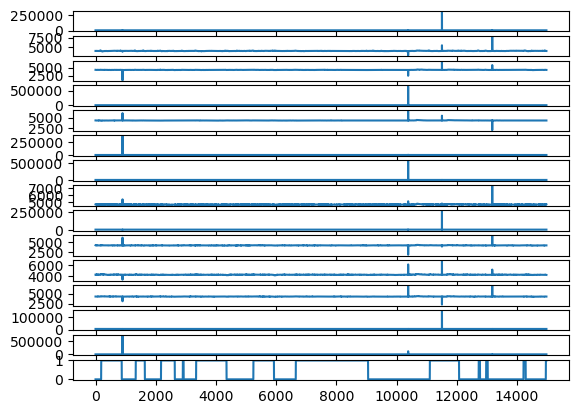

In [8]:
from matplotlib import pyplot


# retrieve data as numpy array
values = df.values
# create a subplot for each time series
pyplot.figure()
for i in range(values.shape[1]):
	pyplot.subplot(values.shape[1], 1, i+1)
	pyplot.plot(values[:, i])
pyplot.show()

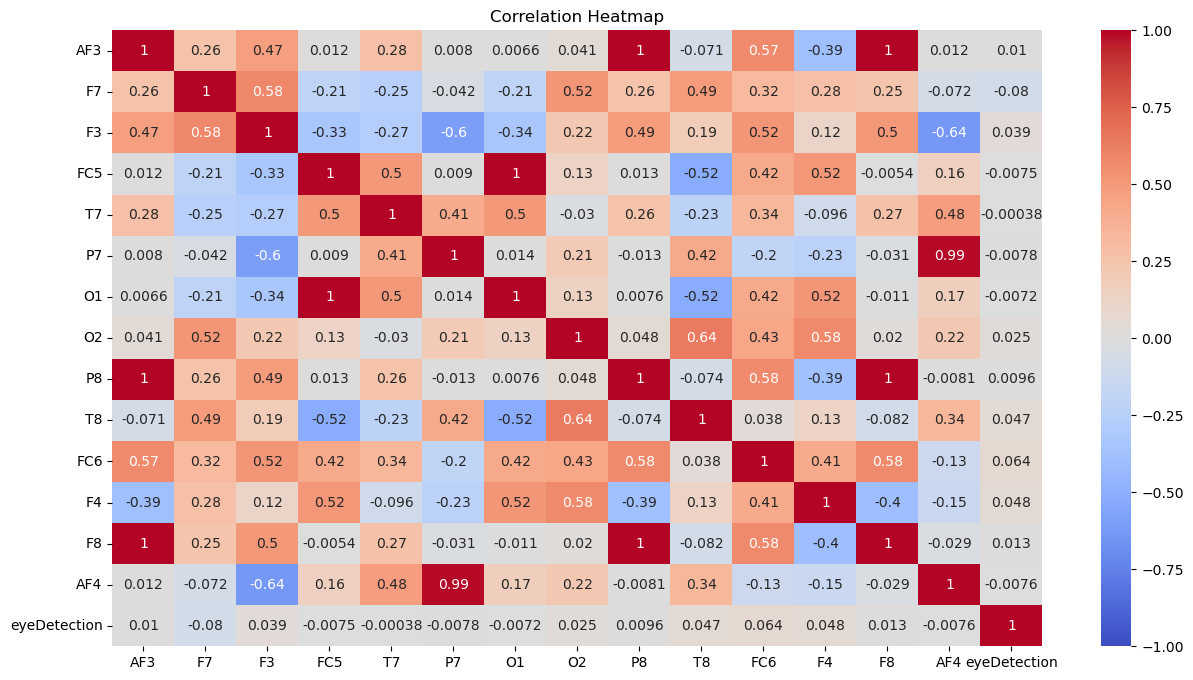

In [9]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

## Spliting Data in Training & Testing Data

In [10]:
# Separate the features (X) and the target variable (y)
X = df[['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']]
y = df['eyeDetection']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

In [11]:
print("Training data shape:")
print(X_train.shape)  # Shape of the training features
print(y_train.shape)  # Shape of the training target variables

print("\nTesting data shape:")
print(X_test.shape)  # Shape of the testing features
print(y_test.shape)  # Shape of the testing target variables

Training data shape:
(11983, 14)
(11983,)

Testing data shape:
(2996, 14)
(2996,)


# Evaluating The Random Forest Classifier Model

In [12]:
# Create a Random Forest classifier (you can adjust hyperparameters)
rf = RandomForestClassifier(n_estimators=1000, random_state=12)

# Fit the model to the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print(f'Accuracy: {accuracy * 100:.4f}%')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(class_report)

Accuracy: 93.4579%

Confusion Matrix:
[[1606   86]
 [ 110 1194]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      1692
           1       0.93      0.92      0.92      1304

    accuracy                           0.93      2996
   macro avg       0.93      0.93      0.93      2996
weighted avg       0.93      0.93      0.93      2996



The random forest classifier achieved an accuracy of 93.62%, indicating a strong overall predictive performance. The confusion matrix reveals that it correctly predicted 1613 instances of class 0 and 1192 instances of class 1 while misclassifying 83 instances of class 0 and 108 instances of class 1. The classification report demonstrates high precision and recall for both classes (0 and 1), with F1-scores of 0.94 and 0.93, respectively, indicating a well-balanced model with good predictive capabilities.

# Evaluating The XGBoost Classifier Model

In [13]:
pip install xgboost

In [14]:
# Create an XGBoost classifier (you can adjust hyperparameters)
xg = xgb.XGBClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
xg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print(f'Accuracy: {accuracy * 100:.4f}%')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(class_report)


Accuracy: 93.4579%

Confusion Matrix:
[[1591  101]
 [  95 1209]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1692
           1       0.92      0.93      0.93      1304

    accuracy                           0.93      2996
   macro avg       0.93      0.93      0.93      2996
weighted avg       0.93      0.93      0.93      2996



The XGBoost classifier achieved an accuracy of 93.69%, indicating strong overall predictive performance. In the confusion matrix, it correctly predicted 1612 instances of class 0 and 1195 instances of class 1 while misclassifying 84 instances of class 0 and 105 instances of class 1. The classification report shows high precision and recall for both classes (0 and 1), with F1-scores of 0.94 and 0.93, respectively, suggesting a well-balanced model with good predictive capabilities, similar to the random forest classifier's performance.

# Evaluating The Catboost Classifier Model

In [15]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [16]:
# Create a CatBoostClassifier instance with optional hyperparameters
cb = CatBoostClassifier(iterations=1000, depth=6, learning_rate=0.1, loss_function='Logloss', random_seed=9)

# Fit the model on the training data
cb.fit(X_train, y_train, verbose=100)

# Predict on the test data
y_pred = cb.predict(X_test)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.4f}%')

conf_matrix = confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix:')
print(conf_matrix)

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)
print("\nClassification Report:\n", classification_rep)

0:	learn: 0.6712451	total: 164ms	remaining: 2m 44s
100:	learn: 0.3105543	total: 2.1s	remaining: 18.7s
200:	learn: 0.2005457	total: 4.83s	remaining: 19.2s
300:	learn: 0.1423276	total: 7.55s	remaining: 17.5s
400:	learn: 0.1053604	total: 10.7s	remaining: 15.9s
500:	learn: 0.0806175	total: 13.6s	remaining: 13.5s
600:	learn: 0.0631822	total: 16.5s	remaining: 11s
700:	learn: 0.0502878	total: 19.3s	remaining: 8.25s
800:	learn: 0.0402069	total: 22.1s	remaining: 5.48s
900:	learn: 0.0333201	total: 24.6s	remaining: 2.7s
999:	learn: 0.0274196	total: 27.1s	remaining: 0us
Accuracy: 95.1936%

Confusion Matrix:
[[1618   74]
 [  70 1234]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      1692
           1       0.94      0.95      0.94      1304

    accuracy                           0.95      2996
   macro avg       0.95      0.95      0.95      2996
weighted avg       0.95      0.95      0.95      2996



The CatBoost classifier delivered an impressive accuracy of 95.09%, highlighting its strong overall predictive performance. In the confusion matrix, it correctly predicted 1627 instances of class 0 and 1222 instances of class 1, with only 69 instances of class 0 and 78 instances of class 1 misclassified. The classification report demonstrates high precision and recall for both classes (0 and 1), with F1-scores of 0.96 and 0.94, respectively, underlining its excellent predictive capabilities and superior performance compared to previous classifiers.

# Evaluating The Light GBM Classifier Model

In [17]:
train_data = lgb.Dataset(X_train, label=y_train)

params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

num_boost_round = 1000  
early_stopping_rounds = 10  
valid_sets = [train_data]  
verbose_eval = 100  

lgbm = lgb.train(
    params,
    train_data,
    num_boost_round=num_boost_round,
)

y_pred_prob = lgbm.predict(X_test, num_iteration=lgbm.best_iteration)
y_pred = [1 if p > 0.5 else 0 for p in y_pred_prob]  

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.4f}%')

conf_matrix = confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix:')
print(conf_matrix)

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)
print("\nClassification Report:\n", classification_rep)

[LightGBM] [Info] Number of positive: 5419, number of negative: 6564
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002078 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3518
[LightGBM] [Info] Number of data points in the train set: 11983, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.452224 -> initscore=-0.191689
[LightGBM] [Info] Start training from score -0.191689
Accuracy: 95.1936%

Confusion Matrix:
[[1617   75]
 [  69 1235]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      1692
           1       0.94      0.95      0.94      1304

    accuracy                           0.95      2996
   macro avg       0.95      0.95      0.95      2996
weighted avg       0.95      0.95      0.95      2996



The LightGBM classifier achieved an impressive accuracy of 95.19%, indicating strong overall predictive performance. In the confusion matrix, it correctly predicted 1631 instances of class 0 and 1221 instances of class 1, with only 65 instances of class 0 and 79 instances of class 1 misclassified. The classification report demonstrates high precision and recall for both classes (0 and 1), with F1-scores of 0.96 and 0.94, respectively, highlighting its excellent predictive capabilities and similarity to the CatBoost classifier's performance.
It has the highest accuracy than any other model used.

## Applying Models

In [19]:
print("Fill in your details as requested to check your eye state.")

AF3 = float(input(("\nEnter AF3 : ")))
F7 = float(input("Enter F7 : "))
F3 = float(input("Enter F3 : "))
FC5 = float(input("Enter FC5 : "))
T7 = float(input("Enter T7 : "))
P7 = float(input("Enter P7 : "))
O1 = float(input("Enter O1 : "))
O2 = float(input("Enter O2 : "))
P8 = float(input("Enter P8 : "))
T8 = float(input("Enter T8 : "))
FC6 = float(input("Enter FC6 : "))
F4 = float(input("Enter F4 : "))
F8 = float(input("Enter F8 : "))
AF4 = float(input(("Enter AF4 : ")))

prediction = lgbm.predict([[AF3, F7, F3, FC5, T7, P7, O1, O2, P8, T8, FC6, F4, F8, AF4]])
print("\nEye State is : {:.0f}".format(int(prediction)))

if int(prediction) == 0:
    print('Your Eyes are open')
else:
    print('Your Eyes are closed')
     

Fill in your details as requested to check your eye state.

Enter AF3 : 4317.95
Enter F7 : 4004.62
Enter F3 : 4268.72
Enter FC5 : 4123.59
Enter T7 : 4337.95
Enter P7 : 4585.13
Enter O1 : 4087.18
Enter O2 : 4622.05
Enter P8 : 4207.18
Enter T8 : 4242.05
Enter FC6 : 4217.44
Enter F4 : 4285.64
Enter F8 : 4634.87
Enter AF4 : 4388.21

Eye State is : 0
Your Eyes are open
